## **1. Download dataset**
!gdown --id 1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_
!unzip twitter_sentiment_analysis_3cls_dataset.zip

## **2. Import libraries**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **3. Read dataset**

In [54]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(
    filepath_or_buffer=dataset_path
)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## **4. Split x and y**

In [55]:
dataset_arr = df.to_numpy()
x, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

## **5. Add bias term**

In [56]:
x_b = np.concatenate(
    (np.ones((x.shape[0], 1)), x), 
    axis=1)

## **6. One-hot encoding label**

In [57]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]
print(f'Number of classes: {n_classes}')
print(f'Number of samples: {n_samples}')

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1
print(f'Shape of y_encoded: {y_encoded.shape}')

Number classes: 2
Number samples: 284807
Shape of y_encoded: (284807, 2)


## **7. Split train, val, test set**

In [58]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

x_train, x_val, y_train, y_val = train_test_split(
    x_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

## **8. Normalization**

In [59]:
normalizer = StandardScaler()
x_train[:, 1:] = normalizer.fit_transform(x_train[:, 1:])
x_val[:, 1:] = normalizer.transform(x_val[:, 1:])
x_test[:, 1:] = normalizer.transform(x_test[:, 1:])

## **9. Define essential functions**

In [60]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]


def predict(x, theta):
    z = x @ theta
    return softmax(z)


def compute_loss(y_hat, y):
    return (-1 / y.size) * (y * np.log(y_hat)).sum()


def compute_gradient(x, y, y_hat):
    return x.T @ (y_hat - y) / y.size


def update_theta(theta, grad, lr):
    return theta - lr * grad


def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta)
    return (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

## **10. Declare parameters and initialize weights**

In [70]:
lr = 0.01
epochs = 20
batch_size = 1024
n_features = x_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)               

## **11. Training model**

In [71]:
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accuracy = []
    val_batch_losses = []
    val_batch_accuracy = []    
    
    for i in range(0, x_train.shape[0], batch_size):
        x_i = x_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        y_hat = predict(x_i, theta)
        train_batch_losses.append(compute_loss(y_hat, y_i))
        gradient = compute_gradient(x_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_accuracy.append(compute_accuracy(x_train, y_train, theta))
        
        y_hat_val = predict(x_val, theta)
        val_batch_losses.append(compute_loss(y_hat_val, y_val))
        val_batch_accuracy.append(compute_accuracy(x_val, y_val, theta))
        
    train_losses.append(np.mean(train_batch_losses))
    train_accuracy.append(np.mean(train_batch_accuracy))
    val_losses.append(np.mean(val_batch_losses))
    val_accuracy.append(np.mean(val_batch_accuracy))
    print(f'\nEPOCH {epoch + 1}: \tTraining loss: {train_losses[-1]:.3f}\tValidation loss: {val_losses[-1]:.3f}')


EPOCH 1: 	Training loss: 0.300	Validation loss: 0.297

EPOCH 2: 	Training loss: 0.176	Validation loss: 0.174

EPOCH 3: 	Training loss: 0.115	Validation loss: 0.113

EPOCH 4: 	Training loss: 0.081	Validation loss: 0.080

EPOCH 5: 	Training loss: 0.062	Validation loss: 0.061

EPOCH 6: 	Training loss: 0.049	Validation loss: 0.049

EPOCH 7: 	Training loss: 0.041	Validation loss: 0.041

EPOCH 8: 	Training loss: 0.035	Validation loss: 0.035

EPOCH 9: 	Training loss: 0.031	Validation loss: 0.031

EPOCH 10: 	Training loss: 0.028	Validation loss: 0.027

EPOCH 11: 	Training loss: 0.025	Validation loss: 0.025

EPOCH 12: 	Training loss: 0.023	Validation loss: 0.023

EPOCH 13: 	Training loss: 0.021	Validation loss: 0.021

EPOCH 14: 	Training loss: 0.020	Validation loss: 0.020

EPOCH 15: 	Training loss: 0.019	Validation loss: 0.018

EPOCH 16: 	Training loss: 0.017	Validation loss: 0.017

EPOCH 17: 	Training loss: 0.017	Validation loss: 0.016

EPOCH 18: 	Training loss: 0.016	Validation loss: 0.015



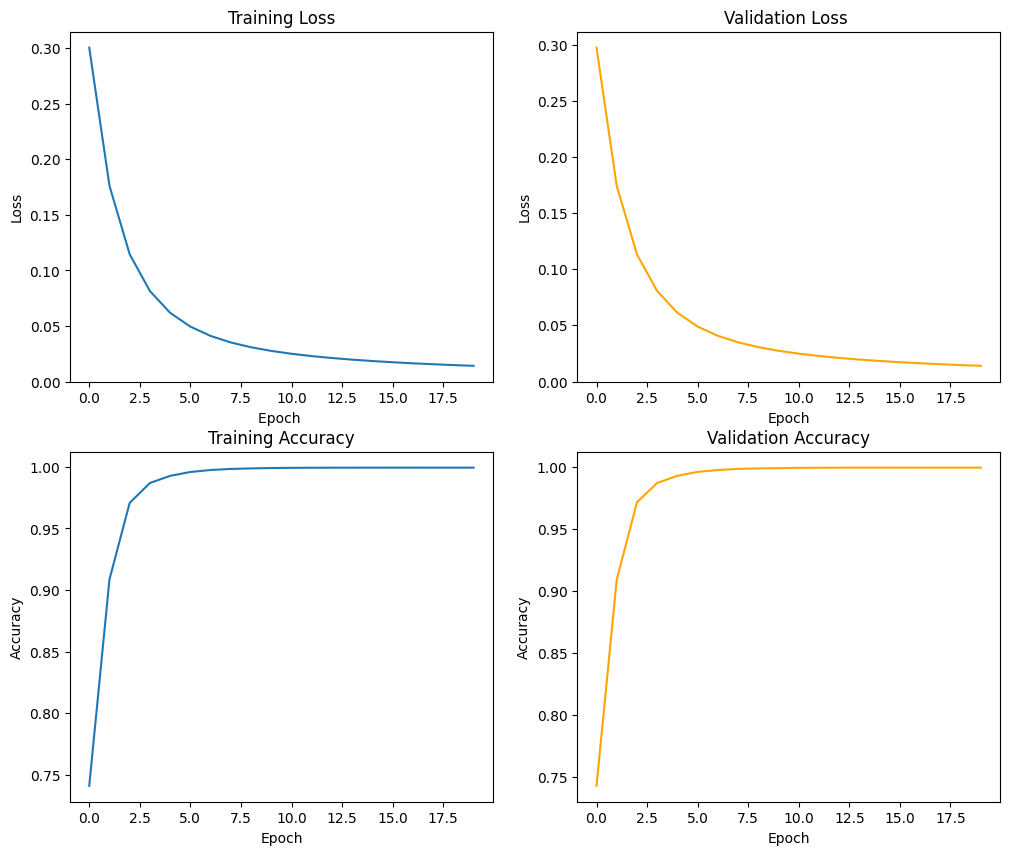

In [72]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch ', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss ')

ax[1, 0].plot(train_accuracy)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracy, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## **12. Evaluation**

In [73]:
val_set_acc = compute_accuracy(x_val, y_val, theta)
test_set_acc = compute_accuracy(x_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Evaluation accuracy: {val_set_acc}')
print(f'Validation accuracy: {test_set_acc}')

Evaluation on validation and test set:
Evaluation accuracy: 0.9994733330992591
Validation accuracy: 0.9992626663389628
